<a href="https://colab.research.google.com/github/sudhamsalagar123/data-pipeline-for-data-analysis/blob/main/data_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# 1. Load the dataset
# --------------------------
print("Step 1: Loading the dataset")
df = pd.read_csv('customer_sales_dataset.csv')

Step 1: Loading the dataset


In [6]:
# Display basic information about the dataset
df.head()

,customer_id,age,gender,income,education,purchase_amount,purchase_date,product_category,satisfaction_score,subscription_status,last_purchase_days,email,address,discount_used,payment_method
0,1,34.0,Male,62000.0,Bachelor's,149.99,2023-05-15,Electronics,4.2,Active,45,john.doe@email.com,"123 Main St, Anytown, CA",Yes,Credit Card
1,2,29.0,Female,48000.0,Master's,89.50,2023-06-20,Clothing,3.8,Active,10,jane.smith@email.com,"456 Oak Ave, Somewhere, NY",No,PayPal
2,3,45.0,NaN,75000.0,PhD,210.75,2023-04-30,Home Goods,4.7,Inactive,120,bob.johnson@email.com,"789 Pine Rd, Nowhere, TX",Yes,Debit Card
3,4,22.0,Male,31000.0,High School,NaN,2023-07-02,Electronics,3.5,Active,3,mike.wilson@email.com,"321 Elm St, Anyplace, FL",No,Credit Card
4,5,38.0,Female,58000.0,Bachelor's,129.99,2023-05-28,Beauty,4.9,Active,32,sarah.brown@email.com,"654 Maple Dr, Somewhere, CA",Yes,PayPal


In [7]:
# Summary of the data
print("\nBasic information about the dataset:")
print(df.info())



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          30 non-null     int64  
 1   age                  29 non-null     float64
 2   gender               29 non-null     object 
 3   income               29 non-null     float64
 4   education            29 non-null     object 
 5   purchase_amount      29 non-null     float64
 6   purchase_date        30 non-null     object 
 7   product_category     30 non-null     object 
 8   satisfaction_score   29 non-null     float64
 9   subscription_status  30 non-null     object 
 10  last_purchase_days   30 non-null     int64  
 11  email                29 non-null     object 
 12  address              29 non-null     object 
 13  discount_used        30 non-null     object 
 14  payment_method       30 non-null     object 
dtypes: f

In [8]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       customer_id        age         income  purchase_amount  \
count    30.000000  29.000000      29.000000        29.000000   
mean     15.500000  35.758621   64517.241379       176.327241   
std       8.803408  10.411721   23372.176208       114.245772   
min       1.000000  19.000000   25000.000000        45.990000   
25%       8.250000  27.000000   48000.000000        89.500000   
50%      15.500000  36.000000   66000.000000       154.990000   
75%      22.750000  43.000000   78000.000000       199.990000   
max      30.000000  55.000000  110000.000000       499.990000   

       satisfaction_score  last_purchase_days  
count           29.000000           30.000000  
mean             3.951724           64.533333  
std              0.808712           62.042107  
min              1.900000           -3.000000  
25%              3.700000           10.500000  
50%              4.200000           40.000000  
75%              4.500000          134.250000  
max     

In [10]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
customer_id            0
age                    1
gender                 1
income                 1
education              1
purchase_amount        1
purchase_date          0
product_category       0
satisfaction_score     1
subscription_status    0
last_purchase_days     0
email                  1
address                1
discount_used          0
payment_method         0
dtype: int64


In [11]:
# 2. Data Cleaning
# --------------------------
print("\nStep 2: Data Cleaning")


Step 2: Data Cleaning


In [12]:
# Make a copy to avoid modifying the original data
df_cleaned = df.copy()


In [13]:
# Fix data types
# Convert purchase_date to datetime, handling errors
df_cleaned['purchase_date'] = pd.to_datetime(df_cleaned['purchase_date'], errors='coerce')

In [14]:
# Handle missing values
# For numerical columns - use the mean
numerical_imputer = SimpleImputer(strategy='mean')
numerical_columns = ['age', 'income', 'purchase_amount', 'satisfaction_score', 'last_purchase_days']
df_cleaned[numerical_columns] = numerical_imputer.fit_transform(df_cleaned[numerical_columns])

In [15]:

# For categorical columns - use the most frequent value
categorical_columns = ['gender', 'education', 'product_category', 'subscription_status',
                      'discount_used', 'payment_method']
for col in categorical_columns:
    most_frequent = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(most_frequent, inplace=True)

<ipython-input-15-6b966c18ac3c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(most_frequent, inplace=True)


In [16]:

# Handle missing emails and addresses with placeholder
df_cleaned['email'].fillna('unknown@email.com', inplace=True)
df_cleaned['address'].fillna('Unknown Address', inplace=True)

<ipython-input-16-64d163d87448>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['email'].fillna('unknown@email.com', inplace=True)
<ipython-input-16-64d163d87448>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [17]:
print("After cleaning, missing values in each column:")
print(df_cleaned.isnull().sum())


After cleaning, missing values in each column:
customer_id            0
age                    0
gender                 0
income                 0
education              0
purchase_amount        0
purchase_date          1
product_category       0
satisfaction_score     0
subscription_status    0
last_purchase_days     0
email                  0
address                0
discount_used          0
payment_method         0
dtype: int64


In [18]:
# 3. Exploratory Data Analysis (Basic)
# --------------------------
print("\nStep 3: Basic Exploratory Data Analysis")


Step 3: Basic Exploratory Data Analysis


In [19]:
# Distribution of categorical data
print("\nGender distribution:")
print(df_cleaned['gender'].value_counts())


Gender distribution:
gender
Male          15
Female        13
Non-Binary     2
Name: count, dtype: int64


In [20]:
print("\nProduct category distribution:")
print(df_cleaned['product_category'].value_counts())


Product category distribution:
product_category
Clothing       8
Electronics    7
Home Goods     6
Sports         5
Beauty         4
Name: count, dtype: int64


Created purchase amount distribution plot (saved as 'purchase_distribution.png')


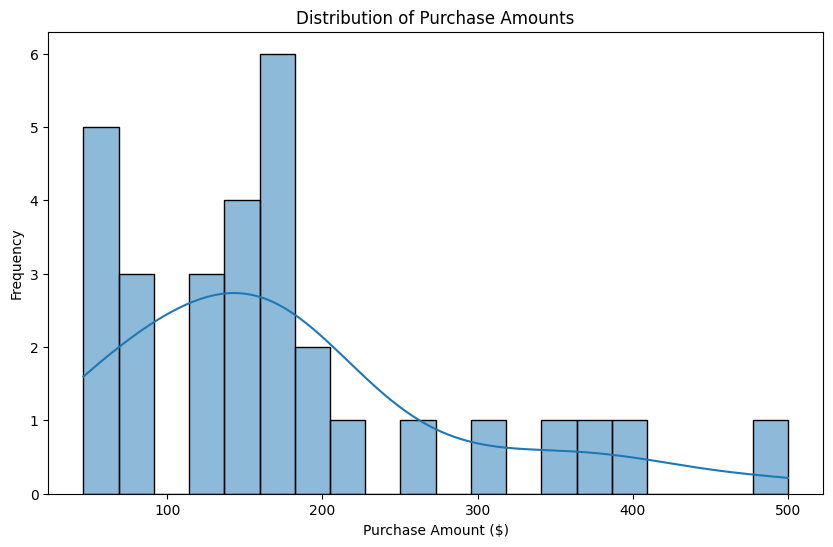

In [21]:
# Create a simple visualization
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['purchase_amount'], bins=20, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Frequency')
plt.savefig('purchase_distribution.png')  # Save the plot
print("Created purchase amount distribution plot (saved as 'purchase_distribution.png')")


In [25]:

# Create new features from existing ones
# Extract month from purchase date
df_cleaned['purchase_month'] = df_cleaned['purchase_date'].dt.month

In [26]:
# Create a loyalty score based on recency and satisfaction
df_cleaned['loyalty_score'] = (5 - df_cleaned['last_purchase_days']/100) * df_cleaned['satisfaction_score']
df_cleaned['loyalty_score'] = df_cleaned['loyalty_score'].clip(1, 5)  # Clip values between 1 and 5

In [27]:
# Create a high-value customer flag
df_cleaned['high_value_customer'] = (df_cleaned['income'] > df_cleaned['income'].mean()) & \
                                   (df_cleaned['purchase_amount'] > df_cleaned['purchase_amount'].mean())

print("New features added: 'purchase_month', 'loyalty_score', 'high_value_customer'")
print("\nSample of data with new features:")
print(df_cleaned[['customer_id', 'purchase_month', 'loyalty_score', 'high_value_customer']].head())

New features added: 'purchase_month', 'loyalty_score', 'high_value_customer'

Sample of data with new features:
   customer_id  purchase_month  loyalty_score  high_value_customer
0            1             5.0            5.0                False
1            2             6.0            5.0                False
2            3             4.0            5.0                 True
3            4             7.0            5.0                False
4            5             5.0            5.0                False


In [28]:
# 5. Feature Preprocessing for Machine Learning
# --------------------------
print("\nStep 5: Feature Preprocessing for Machine Learning")


Step 5: Feature Preprocessing for Machine Learning


In [30]:

# Select features and target for a predictive model
# Let's say we want to predict 'high_value_customer'
features = df_cleaned.drop(['customer_id', 'email', 'address', 'purchase_date', 'high_value_customer'], axis=1)
target = df_cleaned['high_value_customer']


In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 22 samples
Test set size: 8 samples


In [32]:
# Identify numerical and categorical columns for preprocessing
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [35]:
print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


Numerical features: ['age', 'income', 'purchase_amount', 'satisfaction_score', 'last_purchase_days', 'purchase_month', 'loyalty_score']
Categorical features: ['gender', 'education', 'product_category', 'subscription_status', 'discount_used', 'payment_method']


In [36]:
# Create preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [37]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [38]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [39]:

# Apply preprocessing
print("\nApplying preprocessing transformations...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training set shape: {X_train_processed.shape}")
print(f"Processed test set shape: {X_test_processed.shape}")


Applying preprocessing transformations...
Processed training set shape: (22, 25)
Processed test set shape: (8, 25)


In [41]:

# Save the cleaned dataframe to a new CSV file
df_cleaned.to_csv('cleaned_customer_data.csv', index=False)
print("Cleaned data saved to 'cleaned_customer_data.csv'")

print("\nData preprocessing complete!")
print("Next steps: You can now use X_train_processed and y_train to train a machine learning model,")
print("and X_test_processed and y_test to evaluate its performance.")


Cleaned data saved to 'cleaned_customer_data.csv'

Data preprocessing complete!
Next steps: You can now use X_train_processed and y_train to train a machine learning model,
and X_test_processed and y_test to evaluate its performance.


In [42]:
dff=pd.read_csv('cleaned_customer_data.csv')

In [43]:
dff

,customer_id,age,gender,income,education,purchase_amount,purchase_date,product_category,satisfaction_score,subscription_status,last_purchase_days,email,address,discount_used,payment_method,purchase_month,loyalty_score,high_value_customer
0,1,34.000000,Male,62000.000000,Bachelor's,149.990000,2023-05-15,Electronics,4.200000,Active,45.0,john.doe@email.com,"123 Main St, Anytown, CA",Yes,Credit Card,5.0,5.0,False
1,2,29.000000,Female,48000.000000,Master's,89.500000,2023-06-20,Clothing,3.800000,Active,10.0,jane.smith@email.com,"456 Oak Ave, Somewhere, NY",No,PayPal,6.0,5.0,False
2,3,45.000000,Male,75000.000000,PhD,210.750000,2023-04-30,Home Goods,4.700000,Inactive,120.0,bob.johnson@email.com,"789 Pine Rd, Nowhere, TX",Yes,Debit Card,4.0,5.0,True
3,4,22.000000,Male,31000.000000,High School,176.327241,2023-07-02,Electronics,3.500000,Active,3.0,mike.wilson@email.com,"321 Elm St, Anyplace, FL",No,Credit Card,7.0,5.0,False
4,5,38.000000,Female,58000.000000,Bachelor's,129.990000,2023-05-28,Beauty,4.900000,Active,32.0,sarah.brown@email.com,"654 Maple Dr, Somewhere, CA",Yes,PayPal,5.0,5.0,False
5,6,51.000000,Male,92000.000000,Master's,349.990000,2023-03-15,Electronics,2.100000,Inactive,165.0,dave.miller@email.com,"987 Cedar Ln, Anywhere, WA",No,Credit Card,3.0,5.0,True
6,7,27.000000,Female,42000.000000,Bachelor's,74.500000,2023-06-18,Clothing,4.300000,Active,12.0,lisa.jones@email.com,"159 Birch Rd, Someplace, IL",Yes,Debit Card,6.0,5.0,False
7,8,33.000000,Male,67000.000000,Bachelor's,189.990000,2023-05-10,Sports,4.500000,Active,50.0,chris.taylor@email.com,"753 Spruce St, Anycity, GA",No,PayPal,5.0,5.0,True
8,9,41.000000,Female,72000.000000,PhD,159.990000,2023-04-25,Home Goods,3.951724,Active,135.0,amy.white@email.com,"852 Pine Ave, Somewhere, CO",Yes,Credit Card,4.0,5.0,False
9,10,19.000000,Non-Binary,25000.000000,High School,49.990000,2023-07-05,Clothing,3.900000,Active,0.0,alex.martin@email.com,"426 Oak St, Anytown, NY",No,Debit Card,7.0,5.0,False
